<a href="https://colab.research.google.com/github/ramymohamed-sudo/NLP-Preprocessing/blob/master/2021_8_bert0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import string 
import os

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 

In [ ]:
# ! git clone https://github.com/laxmimerit/twitter-disaster-prediction-dataset.git
url = 'https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv'
tweeter = pd.read_csv(url)
tweeter.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
tweeter.shape

(7613, 5)

In [ ]:
tweeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.patches.Wedge at 0x7f27f0a58d90>,
 [Text(-0.24110481617711207, 1.0732513534192263, '0'),
  Text(0.24110481617711216, -1.0732513534192263, '1')],
 [Text(-0.13151171791478838, 0.5854098291377597, '57.03%'),
  Text(0.13151171791478844, -0.5854098291377597, '42.97%')])

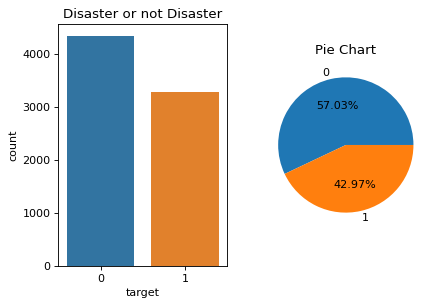

In [ ]:
figure = plt.figure()
figure.figsize = [8,4]
figure.dpi = 80
figure.tight_layout()
axes1 = figure.add_subplot(1,2,1)
axes1.set_title("Disaster or not Disaster")
sns.countplot('target',data=tweeter)
# axes.set_xlabel("")
# axes.plot([x],[y])

axes2 = figure.add_subplot(1,2,2)
axes2.set_title("Pie Chart")

axes2.pie(tweeter.target.value_counts(),labels=["0","1"],
#explode = [0.1,0],
autopct = "%1.2f%%"	# 1 for numbers and 1f for decimal point
)



In [ ]:
tweeter.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64